In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [15]:
#go from 1 to limit by "step" steps
limit=100
step=1

#fn_line = (lambda n: 2**n)
fn_line = (lambda n: n*100)
#fn_line = (lambda n: n**3)

#fn_fact = (lambda n: n/(3**(int(math.log(n,3))+1)-3**int(math.log(n,3))))
fn_fact = (lambda n: n/(2**(int(math.log(n,2))+1)-2**int(math.log(n,2))))

def rotate(n: int):
    alpha = 2*math.pi*fn_fact(n)

    #rotate unit vector [0, 1] by "alpha"
    x = -math.sin(alpha)
    y = math.cos(alpha)
    return (x, y)

def intersect(n: float):
    line1 = (rotate(n), rotate(fn_line(n)))
    p1 = [line1[0][0], line1[0][1]]
    p2 = [line1[1][0], line1[1][1]]

    line2 = (rotate(n+0.001), rotate(fn_line(n+0.001)))
    q1 = [line2[0][0], line2[0][1]]
    q2 = [line2[1][0], line2[1][1]]

    # Line 1 dy, dx and determinant
    a11 = p1[1] - p2[1]
    a12 = p2[0] - p1[0]
    det1 = p1[0]*p2[1] - p2[0]*p1[1]

    # Line 2 dy, dx and determinant
    a21 = q1[1] - q2[1]
    a22 = q2[0] - q1[0]
    det2 = q1[0]*q2[1] - q2[0]*q1[1]

    # determinants for solving system of linear equations
    # a11*x + a12*y + det1 = 0
    # a21*x + a22*y + det2 = 0
    detx = a12*det2-a22*det1
    dety = det1*a21-det2*a11
    det = a11*a22-a21*a12

    if det != 0:
        intersection = (detx/det,dety/det)
        return intersection
    else:
        return None
    
    # Alternative way of solving system of linear equations:
    # coefficient matrix A, right hand side vector b
    
    # A = np.array([[a11, a12], [a21, a22]]) 
    # b = -np.array([det1, det2])
    # try:
    #    intersection = np.linalg.solve(A,b)
    #    #print("{0}\n{1}\n\{2}\n".format(line1,line2,intersection))
    #    return intersection
    # except np.linalg.LinAlgError:
    #    return None

print(intersect(0.4))

(0.18849348041304193, 0.18823887472457979)


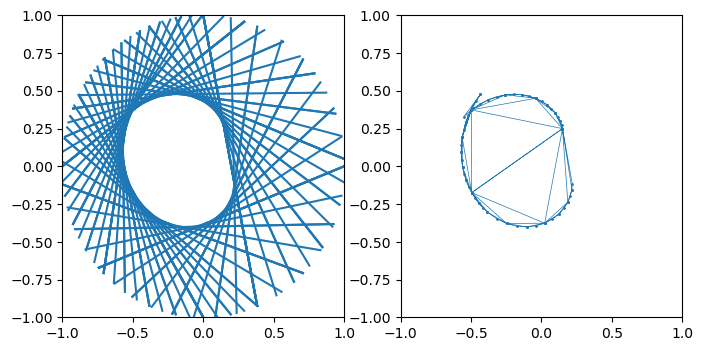

In [16]:
def draw_line(ax, line):
    ax.add_line(mlines.Line2D([line[0][0], line[1][0]], [line[0][1], line[1][1]]))

def draw_dot(ax, pos):
    plt.scatter(pos[0], pos[1], s=2, c='#0000FF')

subplot_size=4
subplot_cols=2
subplot_rows=1

fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(subplot_size*subplot_cols,subplot_size*subplot_rows), dpi=100)
ax = ax.flatten()

ax[0].set_xlim([-1,1])
ax[0].set_ylim([-1,1])
ax[1].set_xlim([-1,1])
ax[1].set_ylim([-1,1])

lines=[]
intersections=[]
for n in np.arange(1, limit, step):
    line = (rotate(n), rotate(fn_line(n)))
    lines.append(line)
    intersection=intersect(n)
    if intersection is not None:
        intersections.append(intersection)

for line in lines:
    draw_line(ax[0], line)

ax[1].plot(*zip(*intersections), '-o', markersize=1, linewidth=0.5)

plt.show()